In [1]:
# 載入需要的套件
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

C:\Users\admin\AppData\Local\Temp\ipykernel_37168\3290451398.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


<html lang="en" style="">
 <head>
  <script async="" charset="UTF-8" src="https://consent.cookiebot.com/0eadae03-33f1-4a15-97c4-7f82433a6838/cc.js?renew=false&amp;referer=www.coindesk.com&amp;dnt=false&amp;init=false&amp;framework=IABv2" type="text/javascript">
  </script>
  <script charset="UTF-8" src="https://consent.cookiebot.com/Framework/IAB/consent-sdk-2.0.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-VM3STRYVN8&amp;l=dataLayer&amp;cx=c" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" id="Cookiebot" src="https://consent.cookiebot.com/uc.js?cbid=0eadae03-33f1-4a15-97c4-7f82433a6838&amp;consentmode-dataredaction=dynamic&amp;framework=IAB" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-W9J8GSW&amp;gtm_auth=YBXBxOFkGb4REqoe6EL-jw&amp;gtm_preview=env-
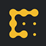

In [19]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.coindesk.com/search?s=bitcoin&sort=1&i=0&cf=Markets")
driver.implicitly_wait(6)


soup = BeautifulSoup(driver.page_source, 'html5lib')
print(soup.prettify())
allnode_of_a = soup.find_all("a",class_='Box-sc-1hpkeeg-0 hBnhmi')
result = [allnode_of_a[_].get("href") for _ in range(2,len(allnode_of_a)+1,2)]
print(result)
driver.close() # 關閉瀏覽器視窗

In [76]:
Sdate=result[0].split('/')
# f'{Sdate[2]}-{Sdate[3]}-{Sdate[4]}'
Sdate

['', 'markets']

In [22]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.coindesk.com/markets/2023/03/28/first-mover-asia-chinas-state-owned-banks-are-soliciting-hong-kong-crypto-business-but-opening-an-account-is-hard/") # 更改網址以前往不同網頁
driver.implicitly_wait(6)
soup = BeautifulSoup(driver.page_source, 'html5lib')
# print(soup.prettify())
allnode_of_a = soup.find_all("div",class_='common-textstyles__StyledWrapper-sc-18pd49k-0 eSbCkN')
result ="".join([_.getText() for _ in allnode_of_a]) 
print(result)
driver.close() # 關閉瀏覽器視窗

C:\Users\admin\AppData\Local\Temp\ipykernel_17368\4120307179.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


Good morning. Here’s what’s happening:Prices: Bitcoin is hovering around $27,000 after the CFTC takes action against Binance.Insights: The Hong Kong branches of China's state-run banks want crypto. Now for the hard part.It's the CFTC vs. LiquidityGood morning. Bitcoin is starting the Asia business day down 3.8% to $26,958 after the U.S. Commodity Futures Trading Commission (CFTC) sued crypto exchange Binance and founder Changpeng Zhao, alleging it offered unregistered crypto derivatives in the U.S.Binance’s BNB token is down 5.9% to $308 on the allegations.The question on the traders' minds is how much of a going concern Binance is now that the CFTC has struck this blow. On the one hand, Binance’s CEO called the CFTC complaint “unexpected and disappointing,” yet, in February, the exchange said it is prepared to pay monetary penalties to “make amends” for sins of the past.At the same time, there is some debate about how much traders are shrugging off the CFTC’s allegations versus how mu

In [ ]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.coindesk.com/markets/2023/03/28/first-mover-asia-chinas-state-owned-banks-are-soliciting-hong-kong-crypto-business-but-opening-an-account-is-hard/") # 更改網址以前往不同網頁
driver.implicitly_wait(6)
soup = BeautifulSoup(driver.page_source, 'html5lib')
# print(soup.prettify())
allnode_of_a = soup.find_all("div",class_='common-textstyles__StyledWrapper-sc-18pd49k-0 eSbCkN')
result = [_.getText() for _ in allnode_of_a]
print(result)
driver.close() # 關閉瀏覽器視窗

In [93]:
CoinURL=[]
CoinDate=[]
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.coindesk.com/search?s=bitcoin&sort=1&i=0&cf=Markets")
driver.maximize_window()

for i in range(2000): 
    driver.implicitly_wait(6) 
    soup = BeautifulSoup(driver.page_source, 'html5lib')   
    allnode_of_a = soup.find_all("a",class_='Box-sc-1hpkeeg-0 hBnhmi')
    result = [allnode_of_a[_].get("href") for _ in range(1,len(allnode_of_a),2)]
    CoinURL+=result

    for Adate in range(len(result)):
        Sdate=result[Adate].split('/')
        if len(Sdate)==7:CoinDate.append(str(Sdate[2]+'-'+Sdate[3]+'-'+Sdate[4]))
        else:CoinDate.append('None')

    driver.execute_script("window.scrollBy(0, 2500);")

    
    if i ==1:Next=driver.find_element(By.XPATH,'//*[@id="queryly_advanced_container"]/div[5]/div[2]/button[5]/h6')
    else:Next=driver.find_element(By.XPATH,'//*[@id="queryly_advanced_container"]/div[5]/div[2]/button[4]/h6')
    time.sleep(2)
    driver.execute_script("arguments[0].click();", Next)
    if i%10==0:
        lo={'CoinURL':CoinURL,'CoinDate':CoinDate}
        df = pd.DataFrame(lo)
        df.to_csv('data/CoinURL-'+str(i)+'.csv')
        print(str(i)+' times done')

lo={'CoinURL':CoinURL,'CoinDate':CoinDate}
df = pd.DataFrame(lo)
df.to_csv('data/CoinURL_final.csv')


driver.close() # 關閉瀏覽器視窗


C:\Users\admin\AppData\Local\Temp\ipykernel_37168\2026886659.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


0 times done
10 times done
20 times done
30 times done
40 times done
50 times done
60 times done
70 times done
80 times done
90 times done
100 times done
110 times done
120 times done
130 times done
140 times done
150 times done
160 times done
170 times done
180 times done
190 times done
200 times done
210 times done
220 times done
230 times done
240 times done
250 times done
260 times done
270 times done
280 times done
290 times done
300 times done
310 times done
320 times done
330 times done
340 times done
350 times done
360 times done
370 times done
380 times done
390 times done
400 times done
410 times done
420 times done
430 times done
440 times done
450 times done
460 times done
470 times done
480 times done
490 times done
500 times done
510 times done
520 times done
530 times done
540 times done
550 times done
560 times done
570 times done
580 times done
590 times done
600 times done
610 times done
620 times done
630 times done
640 times done
650 times done
660 times done
670 ti

In [91]:
a='/markets/2022/11/01/uniswap-surpasses-bitcoin-as-fed-rate-hike-decision-nears/'
len(a.split('/'))


7

In [14]:
from selenium.webdriver.chrome.options import Options

opts = Options()
opts.add_argument("--incognito")  # 使用無痕模式。用 selenium開瀏覽器已經很乾淨了，但疑心病重的可以用一下
ua = "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:53.0) Gecko/20100101 Firefox/53.0"
opts.add_argument("user-agent={}".format(ua))  



df = pd.read_csv('../DataSet/CoinURL_final.csv')
driver = webdriver.Chrome('chromedriver.exe',chrome_options=opts)
CoinText=[]
dataa=len(df['CoinURL'])
for url in range(16402,16436):
    try:
        driver.get("https://www.coindesk.com"+df['CoinURL'][url]) # 更改網址以前往不同網頁
        driver.implicitly_wait(6)
        soup = BeautifulSoup(driver.page_source, 'html5lib')
        allnode_of_a = soup.find_all("div",class_='common-textstyles__StyledWrapper-sc-18pd49k-0 eSbCkN')
        result=["".join([_.getText() for _ in allnode_of_a])]
        CoinText+=result
        print(url)        
    except:
        driver.refresh()
        driver.implicitly_wait(15)
        soup = BeautifulSoup(driver.page_source, 'html5lib')
        allnode_of_a = soup.find_all("div",class_='common-textstyles__StyledWrapper-sc-18pd49k-0 eSbCkN')
        result=["".join([_.getText() for _ in allnode_of_a])]
        CoinText+=result
        print(url)
    if ((url%100)==0) &(url>0):
        driver.close() 
        lo={'CoinText':CoinText,'CoinDate':df['CoinDate'][16402:url+1]}
        df_N = pd.DataFrame(lo)
        df_N.to_csv('CoinText_'+str(url)+'.csv')
        df_N.to_csv('CoinText_final.csv')
        driver = webdriver.Chrome('chromedriver.exe',chrome_options=opts)

lo={'CoinText':CoinText,'CoinDate':df['CoinDate'][16402:url+1]}
df_N = pd.DataFrame(lo)
df_N.to_csv('CoinText_final.csv')

driver.close() # 關閉瀏覽器視窗

C:\Users\nptu\AppData\Local\Temp\ipykernel_16084\3838285511.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe',chrome_options=opts)
C:\Users\nptu\AppData\Local\Temp\ipykernel_16084\3838285511.py:11: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver.exe',chrome_options=opts)


16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435


In [12]:
df = pd.read_csv('../DataSet/CoinURL_final.csv')
df['CoinURL'][16435]

'/markets/2014/10/01/digitaltangible-expands-crypto-20-gold-trading-platform-to-asia/'